/home/dominic/PycharmProjects/CV_learning/notebooks


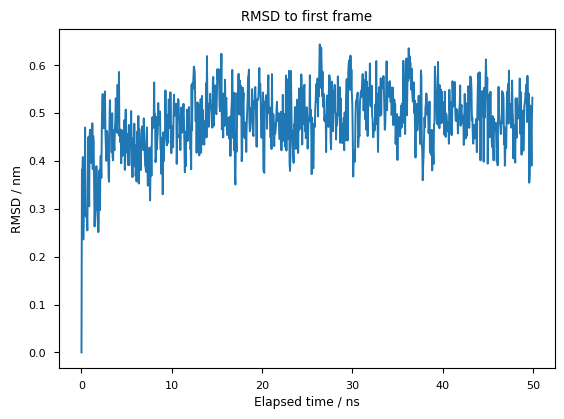

In [4]:
import os
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np
from utils.plotting_functions import init_plot, init_subplot, save_fig

# load trajectory and remove solvent
traj = md.load_dcd('../exp/outputs/chignolin/production_chignolin_1uao-processed_amber_154659_161122/trajectory.dcd', top='../exp/outputs/chignolin/production_chignolin_1uao-processed_amber_154659_161122/topology.pdb', stride=50)
traj = traj.atom_slice(traj.top.select('protein or resname ZNB'))

# calculate RMSD to first frame and plot figure
rmsd = md.rmsd(traj, traj)
#
plt.figure()
plt.plot(np.arange(0, 50, 50/1000), rmsd)
plt.title('RMSD to first frame')
plt.xlabel('Elapsed time / ns')
plt.ylabel('RMSD / nm')
print(os.getcwd())
#plt.savefig('rmsd.png', dpi=300)
plt.show()
plt.close()

In [20]:
traj_subsampled = traj.slice(np.arange(998,19999,1000))

In [21]:
traj_subsampled.n_frames

20

In [22]:
traj_subsampled.save('../exp/outputs/deca_alanine/production_deca-alanine_amber_800K_111122/trajectory_subsampled.dcd')
for i in range(traj_subsampled.n_frames):
    print(f'Saving {i}')
    frame = traj_subsampled.slice(i)
    frame.save(f'../exp/outputs/deca_alanine/production_deca-alanine_amber_800K_111122/structure{i}.pdb')

Saving 0
Saving 1
Saving 2
Saving 3
Saving 4
Saving 5
Saving 6
Saving 7
Saving 8
Saving 9
Saving 10
Saving 11
Saving 12
Saving 13
Saving 14
Saving 15
Saving 16
Saving 17
Saving 18
Saving 19


In [3]:
import mdtraj as md

traj = md.load('../outputs/production_chignolin_1uao_amber_800K_311022/trajectory.dcd', top='../outputs/production_chignolin_1uao_amber_800K_311022/topology.pdb')

OSError: No such file: ../outputs/production_chignolin_1uao_amber_800K_311022/topology.pdb

In [25]:
traj_subsampled = traj.slice(np.arange(998,19999,1000))

In [26]:
traj_subsampled.n_frames

20

In [29]:
traj_subsampled.save('../outputs/production_chignolin_1uao_amber_800K_311022/trajectory_subsampled.dcd')
for i in range(traj_subsampled.n_frames):
    print(f'Saving {i}')
    frame = traj_subsampled.slice(i)
    frame.save(f'../outputs/production_chignolin_1uao_amber_800K_311022/structure{i}.pdb')

Saving 0
Saving 1
Saving 2
Saving 3
Saving 4
Saving 5
Saving 6
Saving 7
Saving 8
Saving 9
Saving 10
Saving 11
Saving 12
Saving 13
Saving 14
Saving 15
Saving 16
Saving 17
Saving 18
Saving 19


/home/dominic/miniconda3/envs/CV_learning/lib/python3.10/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


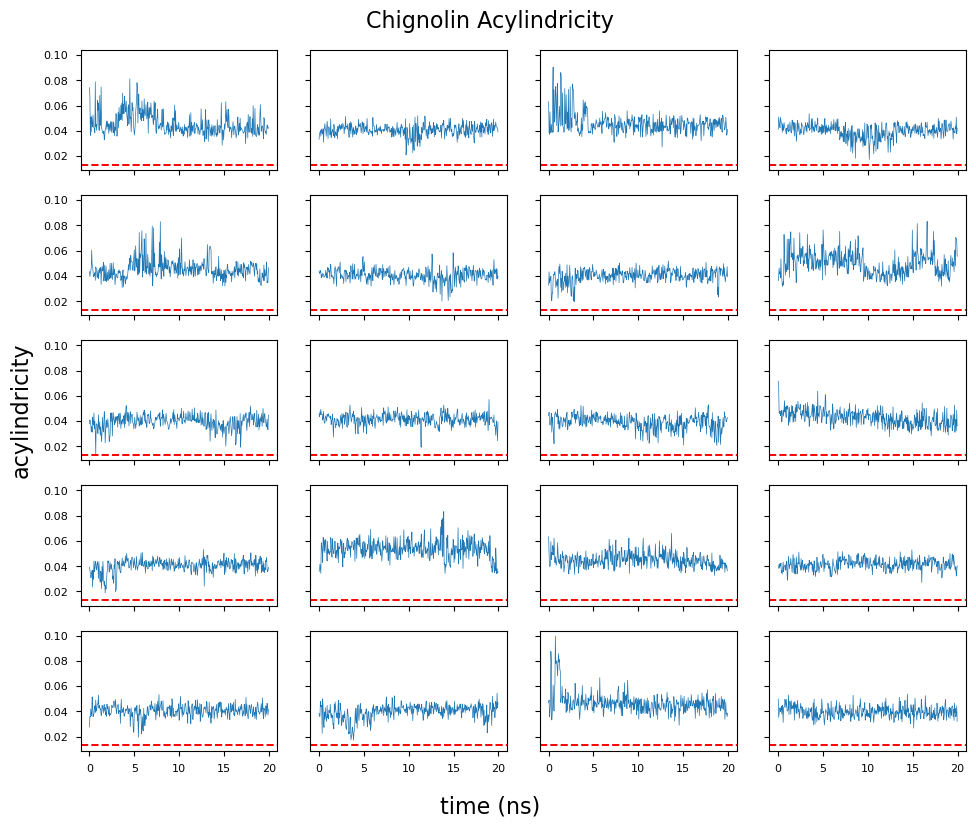

In [3]:
import os
exp_folders = os.listdir('./outputs')

fig, ax = init_subplot(5, 4, "Chignolin RMSD", "time (ns)", "acylindricity")
for idx, folder in enumerate(exp_folders):
    traj = md.load_dcd(f'./outputs/{folder}/trajectory.dcd', top=f'./outputs/{folder}/topology_nw.pdb', stride=50)
    traj = traj.atom_slice(traj.top.select('protein or resname ZNB'))

    ref_traj = md.load_pdb('../outputs/production_chignolin_1uao_amber_800K_311022/topology.pdb')
    quantity = md.acylindricity(traj)
    ref_quantity = md.acylindricity(ref_traj)

    ax[np.unravel_index(idx, (5,4))].plot(np.arange(0, 20, 20/400), quantity, lw=0.5)
    ax[np.unravel_index(idx, (5,4))].axhline(xmin=0, xmax=20, y=ref_quantity, c='r', linestyle='--')

save_fig(fig, '.', 'chignolin_acylindricity')

In [7]:
traj = md.load_dcd('/home/dominic/PycharmProjects/CV_learning/exp/outputs/chignolin/production_5us_structure0_amber_120836_071122/trajectory.dcd', top='/home/dominic/PycharmProjects/CV_learning/exp/outputs/chignolin/production_5us_structure0_amber_120836_071122/topology_nw.pdb', stride=50)
traj = traj.atom_slice(traj.top.select('protein or resname ZNB'))

ref_traj = md.load_pdb('/home/dominic/PycharmProjects/CV_learning/exp/outputs/chignolin/production_chignolin_1uao_amber_800K_311022/topology.pdb')
ref_quantity = md.acylindricity(ref_traj)
# calculate RMSD to first frame and plot figure
#rmsd = md.rmsd(traj, traj)

# fig, ax = init_plot("Acylindricity Chignolin", "time (ns)", "acylindricity")
quantity = md.acylindricity(traj)
# ax.plot(np.arange(0, 5000, 40/400), quantity)
# ax.axhline(xmin=0, xmax=5000, y=ref_quantity, c='r', linestyle='--')
# save_fig(fig, ".", "chignolin_acylindricity_5us")
np.argsort(quantity)[:3]

/home/dominic/miniconda3/envs/CV_learning/lib/python3.10/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


array([18202, 32626, 24632])

In [2]:
import openmm
from Experiment import Experiment
phi = [4, 6, 8 ,14] #dihedral coordinates
psi = [6, 8, 14, 16]
# this is a new comment
exp_ala_1us = Experiment(location='../exp/outputs/alanine_dipeptide/alanine_1us', features='dihedrals')

ModuleNotFoundError: No module named 'openmm'

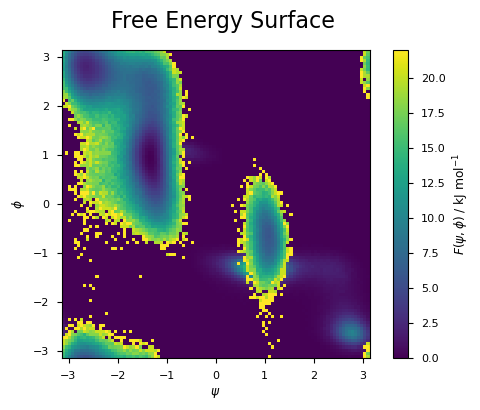

In [6]:
exp_ala_1us.free_energy_plot(features=['PSI 0 ALA 2', 'PHI 0 ALA 2'], feature_nicknames=['\psi', '\phi'], save_name='FES_alanine_dipeptide')

In [22]:
exp_ala_1us.compute_cv('TICA', stride=1, lagtime=1)

Computed CV in 0.086s.


In [23]:
print(exp_ala_1us.CVs['TICA'])

CovarianceKoopmanModel-139882176083712:cov=CovarianceModel-139882124942240:bessels_correction=False,
                 cov_00=array([[ 0.61908, -0.54247],
       [-0.54247,  1.21156]]),
                 cov_0t=array([[ 0.51886, -0.50722],
       [-0.50722,  0.53649]]),
                 cov_tt=array([[ 0.61908, -0.54247],
       [-0.54247,  1.21156]]),
                 data_mean_removed=True, lagtime=1,
                 mean_0=array([-1.53252,  1.31711]),
                 mean_t=array([-1.53252,  1.31711]), symmetrized=True],
                    dim=None, epsilon=1e-06,
                    instantaneous_coefficients=array([[ 0.98432,  0.06249],
       [-0.0975 ,  0.06346]]),
                    instantaneous_obs=<deeptime.basis._base.Concatenation object at 0x7f38d85ab8b0>,
                    rank_0=None, rank_t=None, scaling='kinetic_map',
                    singular_values=array([0.84585, 0.05472]),
                    timelagged_coefficients=array([[ 0.98432,  0.06249],
       [-0.0

100%|██████████| 9/9 [00:00<00:00, 14.77it/s]


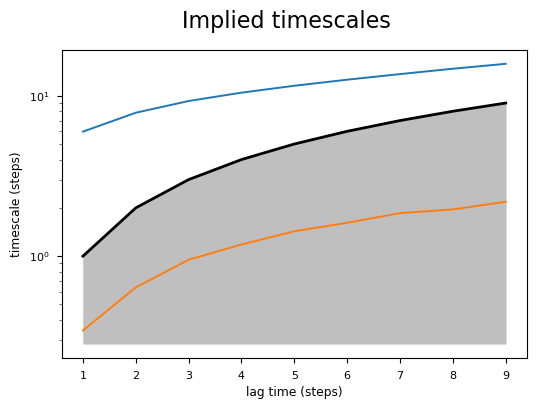

Computed CV in 0.081s.
Computed CV in 0.078s.
Computed CV in 0.08s.
Computed CV in 0.082s.
Computed CV in 0.054s.
Computed CV in 0.05s.
Computed CV in 0.052s.
Computed CV in 0.052s.
Computed CV in 0.054s.


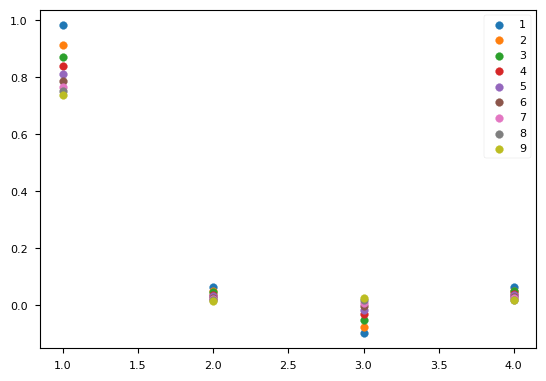

In [36]:
import matplotlib.pyplot as plt
its_objects = []
for lagtime in [1,2,3,4,5,6,7,8,9]:
    exp_ala_1us.compute_cv('TICA', stride=1, lagtime=lagtime)
    its_objects.append(exp_ala_1us.CVs['TICA'])
    plt.scatter([1,2,3,4], exp_ala_1us.CVs['TICA'].instantaneous_coefficients.flatten(), label=f'{lagtime}')
    plt.legend()

Text(0, 0.5, 'timescale (steps)')

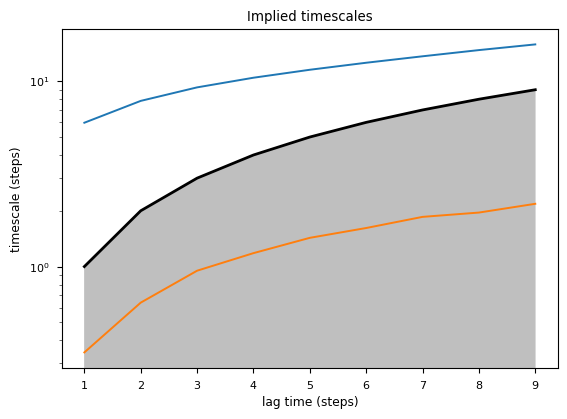

In [40]:
from deeptime.util.validation import implied_timescales
from deeptime.plots import plot_implied_timescales

its_data = implied_timescales(its_objects)

fig, ax = plt.subplots(1, 1)
plot_implied_timescales(its_data, n_its=2, ax=ax)
ax.set_yscale('log')
ax.set_title('Implied timescales')
ax.set_xlabel('lag time (steps)')
ax.set_ylabel('timescale (steps)')

100%|██████████| 9/9 [00:00<00:00, 16.01it/s]


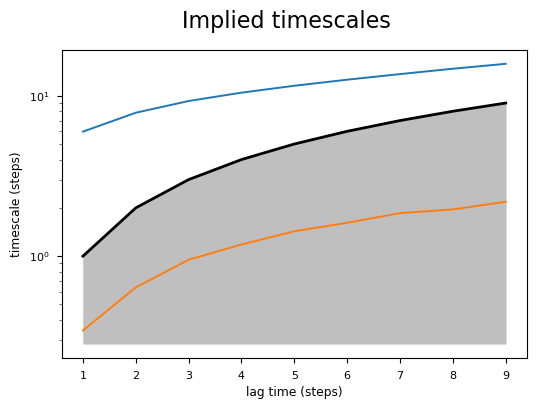

In [3]:
exp_ala_1us.implied_timescale_analysis()